# HR Analytics

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/hr_1920x480_s5WuoZs-thumbnail-1200x1200-90.jpg'>

Practice Problem: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/

## HR Analytics

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

## Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion *(only for manager position and below)* and prepare them in time. Currently the process, they are following is:

* They first identify a set of employees based on recommendations/ past performance
* Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
* At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

<img src = 'https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/wns_hack_im_1.jpg'>

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## Evaluation Metric

The evaluation metric for this competition is F1 Score.

## Public and Private Split

Test data is further randomly divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

## Entorno

In [ ]:
import sys
sys.version

'3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 17:50:39) \n[GCC Clang 10.0.0 ]'

In [ ]:
!conda info --envs

# conda environments:
#
micromaster              /Users/manuel/.conda/envs/micromaster
                         /Users/manuel/.julia/conda/3
base                  *  /Users/manuel/opt/anaconda3
belcorp                  /Users/manuel/opt/anaconda3/envs/belcorp
courseragcp              /Users/manuel/opt/anaconda3/envs/courseragcp
iapucp                   /Users/manuel/opt/anaconda3/envs/iapucp
mitxpro                  /Users/manuel/opt/anaconda3/envs/mitxpro
style-transfer           /Users/manuel/opt/anaconda3/envs/style-transfer
taller-dmc               /Users/manuel/opt/anaconda3/envs/taller-dmc
udacity                  /Users/manuel/opt/anaconda3/envs/udacity



## Paquetes

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook
from pathlib import Path
import random
import warnings
import pickle
import xgboost

warnings.filterwarnings('ignore')


seed = 2020
random.seed(seed)

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 400)
sns.set()

DATA = Path('../../data') 
RAW  = DATA/'raw'
PROCESSED = DATA/'processed'
SUBMISSIONS = DATA/'submissions'    

MODEL = Path('../../model') 

In [ ]:
pd.__version__

'1.1.3'

In [ ]:
np.__version__

'1.19.1'

In [ ]:
sklearn.__version__

'0.23.2'

## Lectura de datos

In [ ]:
os.listdir(f'{PROCESSED}')

['preprocess_v1_train.csv', '.ipynb_checkpoints', 'preprocess_v1_val.csv']

In [ ]:
df_train = pd.read_csv(f'{PROCESSED}/preprocess_v1_train.csv')
df_val = pd.read_csv((f'{PROCESSED}/preprocess_v1_val.csv'))

In [2]:
# Solo para ejecutar en colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Solo para ejecutar en colab
df_train_v1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DiplomadoIA/M1_AprendizajeDeMaquina/Proyecto/preprocess_v1_train.csv', compression='zip')
df_train_v2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DiplomadoIA/M1_AprendizajeDeMaquina/Proyecto/preprocess_v2_train.csv', compression='zip')

In [4]:
df_train_v1.shape, df_train_v2.shape

((43846, 61), (43846, 61))

In [5]:
id_columns = 'employee_id'
target = 'is_promoted'

## Balanceo de clases (?)

In [7]:
SEED = 2020
df_train_v1['is_promoted'].value_counts() 
df_train_v2['is_promoted'].value_counts() 

0    40112
1     3734
Name: is_promoted, dtype: int64

### Oversampling

In [28]:
num_no = df_train['is_promoted'].value_counts()[0]
num_si = df_train['is_promoted'].value_counts()[1]

num_muestras = num_no - num_si
si = df_train[df_train['is_promoted'] == 1]
muestra_si = si.sample(n=num_muestras, random_state=SEED, replace=True)

df_train_m1 = df_train.append(muestra_si)

# Verificamos la distribución de la clase
df_train_m1['is_promoted'].value_counts()

1    40112
0    40112
Name: is_promoted, dtype: int64

In [29]:
import xgboost
modelo_1 = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500, reg_alpha=0.25, random_state=2020)
modelo_1.fit(df_train_m1.drop(target, axis = 1), df_train_m1[target], verbose = 10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0.25, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [30]:
y_train_pred_label_m1 = modelo_1.predict(df_train_m1.drop(target, axis = 1))
y_val_pred_label_m1 = modelo_1.predict(X_val)

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
print(classification_report(df_train_m1[target], y_train_pred_label_m1))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     40112
           1       0.86      0.97      0.91     40112

    accuracy                           0.90     80224
   macro avg       0.91      0.90      0.90     80224
weighted avg       0.91      0.90      0.90     80224



In [32]:
print(classification_report(y_val, y_val_pred_label_m1))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     10028
           1       0.29      0.78      0.42       934

    accuracy                           0.81     10962
   macro avg       0.63      0.80      0.65     10962
weighted avg       0.92      0.81      0.85     10962



In [59]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from matplotlib import pyplot

In [61]:
y_train_pred_m1 = modelo_1.predict_proba(df_train_m1.drop(target, axis = 1))[:,1]
y_val_pred_m1 = modelo_1.predict_proba(X_val)[:,1]

In [62]:
roc_auc_score(df_train_m1[target], y_train_pred_m1)

0.9689560429814271

In [63]:
roc_auc_score(y_val, y_val_pred_m1)

0.9083796098974265

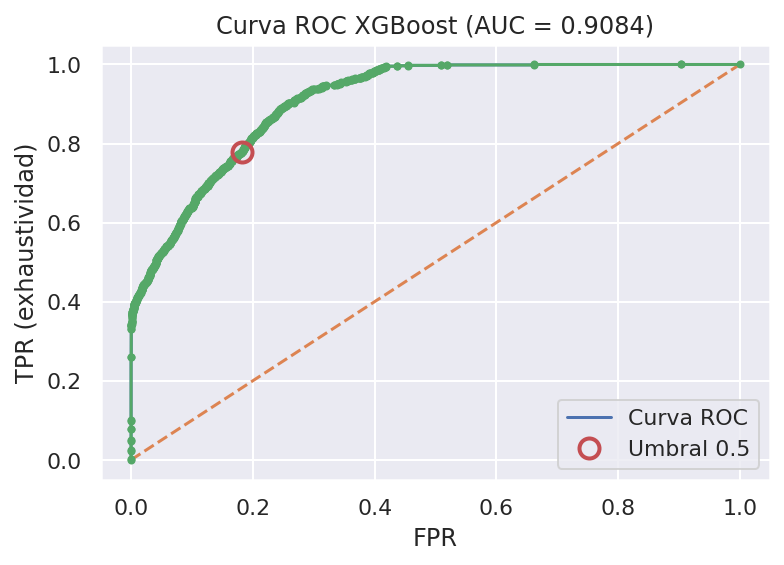

In [64]:
probs = modelo_1.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, probs)
fpr, tpr, umbrales = roc_curve(y_val, y_val_pred_m1)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC XGBoost (AUC = %.4f)" % auc))

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
# show the plot
pyplot.show()

In [65]:
prec, recall, threshold = precision_recall_curve(y_val, probs)

prec_recall = pd.DataFrame({'prec': prec[:-1], 'recall': recall[:-1], 'threshold': threshold})
prec_recall.head()

,prec,recall,threshold
0,0.123317,1.000000,0.002423
1,0.123201,0.998929,0.002425
2,0.123217,0.998929,0.002425
3,0.123233,0.998929,0.002426
4,0.123250,0.998929,0.002426


In [66]:
prec_recall['f1'] = 2*prec_recall['prec']*prec_recall['recall'] / (prec_recall['prec'] + prec_recall['recall'])

In [67]:
prec_recall.sort_values(by = 'f1', ascending = False)

,prec,recall,threshold,f1
7140,0.860465,0.396146,0.862250,0.542522
7147,0.869976,0.394004,0.866953,0.542373
7143,0.864169,0.395075,0.863921,0.542248
7139,0.858469,0.396146,0.860019,0.542125
7150,0.873810,0.392934,0.869298,0.542097
...,...,...,...,...
7560,1.000000,0.005353,0.999998,0.010650
7561,1.000000,0.004283,0.999999,0.008529
7562,1.000000,0.003212,0.999999,0.006403
7563,1.000000,0.002141,0.999999,0.004274


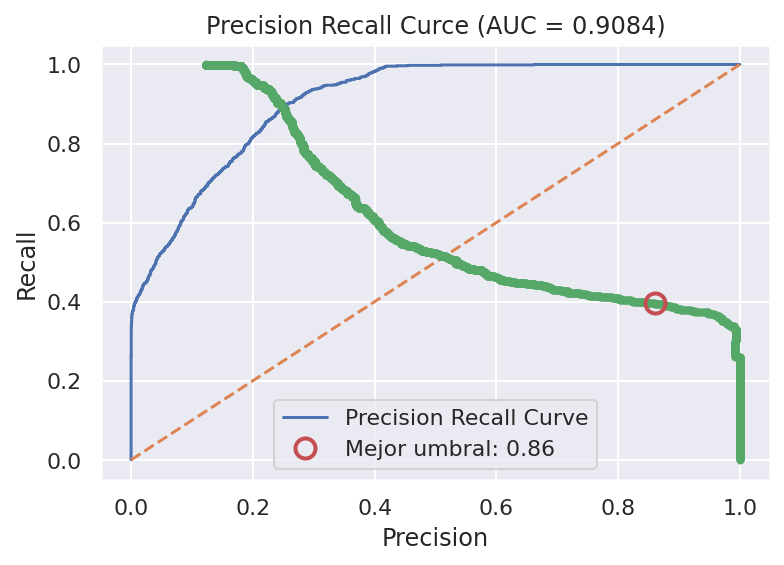

In [68]:
y_val_pred_m1 = modelo_1.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred_m1)

precision, recall, umbrales = precision_recall_curve(y_val, probs)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Precision Recall Curve") )
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title(("Precision Recall Curce (AUC = %.4f)" % auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(prec, recall, marker='.')

f1 = 2*precision*recall / (precision + recall)
best_f1_index = f1.argmax()
best_umbral = umbrales[best_f1_index]

plt.plot(precision[best_f1_index], recall[best_f1_index], 'o', markersize=10,
         label=f"Mejor umbral: {best_umbral:.2f}", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
pyplot.show()

In [70]:
labels = np.where(y_val_pred_m1 > 0.217646, 1, 0)

In [71]:
from sklearn.metrics import f1_score

In [72]:
f1_score(y_val, labels)

0.3569105691056911

### Undersampling

In [33]:
num_no = df_train['is_promoted'].value_counts()[0]
num_si = df_train['is_promoted'].value_counts()[1]

num_muestras = num_si
no = df_train[df_train['is_promoted'] == 0]
muestra_no = no.sample(n=num_muestras, random_state=SEED, replace=False)

df_train_m2 = df_train[df_train['is_promoted'] == 1].append(muestra_no)

# Verificamos la distribución de la clase
df_train_m2['is_promoted'].value_counts()

1    3734
0    3734
Name: is_promoted, dtype: int64

In [34]:
modelo_2 = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500, reg_alpha=0.25, random_state=2020)
modelo_2.fit(df_train_m2.drop(target, axis = 1), df_train_m2[target], verbose = 10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0.25, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
y_train_pred_label_m2 = modelo_2.predict(df_train_m2.drop(target, axis = 1))
y_val_pred_label_m2 = modelo_2.predict(X_val)

In [36]:
print(classification_report(df_train_m2[target], y_train_pred_label_m2))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      3734
           1       0.88      0.97      0.92      3734

    accuracy                           0.92      7468
   macro avg       0.92      0.92      0.92      7468
weighted avg       0.92      0.92      0.92      7468



In [37]:
print(classification_report(y_val, y_val_pred_label_m2))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10028
           1       0.25      0.87      0.39       934

    accuracy                           0.77     10962
   macro avg       0.62      0.81      0.62     10962
weighted avg       0.92      0.77      0.82     10962



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from matplotlib import pyplot

In [ ]:
y_train_pred_m2 = modelo_2.predict_proba(df_train_m2.drop(target, axis = 1))[:,1]
y_val_pred_m2 = modelo_2.predict_proba(X_val)[:,1]

In [ ]:
roc_auc_score(df_train_m2[target], y_train_pred_m2)

In [ ]:
roc_auc_score(y_val, y_val_pred_m2)

In [ ]:
probs = modelo_2.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, probs)
fpr, tpr, umbrales = roc_curve(y_val, y_val_pred_m2)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC XGBoost (AUC = %.4f)" % auc))

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
# show the plot
pyplot.show()

In [ ]:
prec, recall, threshold = precision_recall_curve(y_val, probs)

prec_recall = pd.DataFrame({'prec': prec[:-1], 'recall': recall[:-1], 'threshold': threshold})
prec_recall.head()

In [73]:
prec_recall['f1'] = 2*prec_recall['prec']*prec_recall['recall'] / (prec_recall['prec'] + prec_recall['recall'])

In [ ]:
prec_recall.sort_values(by = 'f1', ascending = False)

In [ ]:
y_val_pred_m2 = modelo_2.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred_m2)

precision, recall, umbrales = precision_recall_curve(y_val, probs)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Precision Recall Curve") )
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title(("Precision Recall Curce (AUC = %.4f)" % auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(prec, recall, marker='.')

f1 = 2*precision*recall / (precision + recall)
best_f1_index = f1.argmax()
best_umbral = umbrales[best_f1_index]

plt.plot(precision[best_f1_index], recall[best_f1_index], 'o', markersize=10,
         label=f"Mejor umbral: {best_umbral:.2f}", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
pyplot.show()

In [ ]:
labels = np.where(y_val_pred_m2 > 0.217646, 1, 0)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_val, labels)

### SMOTE -> "not majority"

In [38]:
import xgboost
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='not majority', k_neighbors=2, random_state=SEED)
X_train_m3, y_train_m3 = sm.fit_resample(df_train.drop(target, axis = 1), df_train[target])
pd.DataFrame(y_train_m3).value_counts()

1    40112
0    40112
dtype: int64

In [39]:
X_val.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'na_previous_year_rating', 'na_education', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', '

In [48]:
X_train_m3 = pd.DataFrame(X_train_m3)
X_train_m3.columns = X_val.columns
X_train_m3.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'na_previous_year_rating', 'na_education', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', '

In [49]:
modelo_3 = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500, reg_alpha=0.25, random_state=2020)
modelo_3.fit(X_train_m3, y_train_m3, verbose = 10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0.25, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
y_train_pred_label_m3 = modelo_3.predict(X_train_m3)
y_val_pred_label_m3 = modelo_3.predict(X_val)

In [51]:
print(classification_report(y_train_m3, y_train_pred_label_m3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     40112
           1       1.00      0.94      0.97     40112

    accuracy                           0.97     80224
   macro avg       0.97      0.97      0.97     80224
weighted avg       0.97      0.97      0.97     80224



In [52]:
print(classification_report(y_val, y_val_pred_label_m3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10028
           1       0.88      0.38      0.53       934

    accuracy                           0.94     10962
   macro avg       0.91      0.69      0.75     10962
weighted avg       0.94      0.94      0.93     10962



### SMOTE + TOMEK 

In [53]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE

smt = SMOTETomek(random_state=2020)
X_train_m4, y_train_m4 = smt.fit_resample(df_train.drop(target, axis = 1), df_train[target])
pd.DataFrame(y_train_m4).value_counts()

1    39819
0    39819
dtype: int64

In [54]:
X_train_m4 = pd.DataFrame(X_train_m4)
X_train_m4.columns = X_val.columns
X_train_m4.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'na_previous_year_rating', 'na_education', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', '

In [55]:
modelo_4 = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500, reg_alpha=0.25, random_state=2020)
modelo_4.fit(X_train_m4, y_train_m4, verbose = 10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0.25, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
y_train_pred_label_m4 = modelo_4.predict(X_train_m4)
y_val_pred_label_m4 = modelo_4.predict(X_val)

In [57]:
print(classification_report(y_train_m4, y_train_pred_label_m4))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     39819
           1       1.00      0.94      0.97     39819

    accuracy                           0.97     79638
   macro avg       0.97      0.97      0.97     79638
weighted avg       0.97      0.97      0.97     79638



In [58]:
print(classification_report(y_val, y_val_pred_label_m4))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10028
           1       0.91      0.38      0.54       934

    accuracy                           0.94     10962
   macro avg       0.93      0.69      0.75     10962
weighted avg       0.94      0.94      0.93     10962



### SMOTE -> "all"

In [ ]:
#not minority (?) misma distribución 
#from imblearn.over_sampling import SMOTE
#
#sm = SMOTE(sampling_strategy='all', k_neighbors=2, random_state=SEED)
#x_SMOTE_m4, y_SMOTE_m4 = sm.fit_resample(df_train.drop(target, axis = 1), df_train[target])
#pd.DataFrame(y_SMOTE_m4).value_counts()

### Tomek -> "not majority"

In [8]:
#from sklearn.datasets import make_classification
#from imblearn.under_sampling import TomekLinks # doctest: +NORMALIZE_WHITESPACE
#
#smt = TomekLinks(sampling_strategy='not majority',)
#x_SMOTE_m5, y_SMOTE_m5 = smt.fit_resample(df_train.drop(target, axis = 1), df_train[target])
#pd.DataFrame(y_SMOTE_m5).value_counts()

0    40112
1     2410
dtype: int64

### Tomek -> "all"

In [9]:
#from sklearn.datasets import make_classification
#from imblearn.under_sampling import TomekLinks # doctest: +NORMALIZE_WHITESPACE
#
#smt = TomekLinks(sampling_strategy='all')
#x_SMOTE_m6, y_SMOTE_m6 = smt.fit_resample(df_train.drop(target, axis = 1), df_train[target])
#pd.DataFrame(y_SMOTE_m6).value_counts()

0    38788
1     2410
dtype: int64

### Tomek -> "not minority"

In [10]:
#from sklearn.datasets import make_classification
#from imblearn.under_sampling import TomekLinks # doctest: +NORMALIZE_WHITESPACE
#
#smt = TomekLinks(sampling_strategy='not minority')
#x_SMOTE_m7, y_SMOTE_m7 = smt.fit_resample(df_train.drop(target, axis = 1), df_train[target])
#pd.DataFrame(y_SMOTE_m7).value_counts()

0    38788
1     3734
dtype: int64

## Features y target

In [18]:
X_train = df_train.drop(target, axis = 1)
y_train = df_train[target]

X_val = df_val.drop(target, axis = 1)
y_val = df_val[target]

In [19]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((80224, 60), (80224,), (10962, 60), (10962,))

## Proporción de target

In [20]:
y_train.mean()

0.5

In [21]:
y_val.mean()

0.08520343003101624

## Information value de clases

Usar information de R o implementar la función en python (rip)

## Entrenamiento

Métricas para Grid Search https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [22]:
import xgboost
from sklearn.model_selection import GridSearchCV

Parámetros de xgboost

In [41]:
xgb = xgboost.XGBClassifier()
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
model_1 = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500, reg_alpha=0.25, random_state=2020)
model_1.fit(df_train.drop(target, axis = 1), df_train[target], verbose = 10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0.25, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

grid search con roc_auc

In [27]:
cv_params = {'max_depth': [3,5],
             'n_estimators' : [1000],
             'reg_alpha' : [0.25],
            'learning_rate':[0.01, 0.001],
            'random_state': [seed]}

In [28]:
gs = GridSearchCV(xgb, cv_params, scoring = 'roc_auc', cv = 5, n_jobs= -1)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

gs = RandomizedSearchCV(xgb, cv_params, scoring = 'roc_auc', cv = 5, n_jobs= -1)

In [ ]:
gs.fit(X_train, y_train, verbose = 10)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
best_xgb = gs.best_estimator_

In [ ]:
best_xgb.get_xgb_params()

Guardar el modelo

In [ ]:
model_label = 'xgboost_roc_auc'

with open(f'{MODEL}/{model_label}_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

grid search con f1

In [ ]:
xgb = xgboost.XGBClassifier()
cv_params = {'max_depth': [2,3,4,5],
             'n_estimators' : [50, 100, 200, 300, 400],
             'reg_alpha' : [0.1, 0.25, 0.5],
            'learning_rate':[0.01, 0.001],
            'random_state': [seed]}
gsf1 = GridSearchCV(xgb, cv_params, scoring = 'f1', cv = 5, n_jobs= -1)
gsf1.fit(X_train, y_train, verbose = 10)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [ ]:
gsf1.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 400,
 'random_state': 2020,
 'reg_alpha': 0.1}

In [ ]:
gsf1.best_score_

0.4359276226250805

In [ ]:
best_xgb_f1 = gsf1.best_estimator_

In [ ]:
best_xgb_f1.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 2020,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

Guardar el modelo

In [ ]:
model_label = 'xgboost_f1'

with open(f'{MODEL}/{model_label}_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_f1, file)

## Importancia de variables en xgboost

In [ ]:
#pd.DataFrame(dataunica).columns

In [ ]:
#clf.get_booster().feature_names = list(['', '', '']) 
#xx = clf.get_booster().get_score(importance_type= 'gain')  
#xx = {k: round(v,2) for k, v in sorted(xx.items(), key=lambda item: item[1])}
#x = {k: xx[k] for k in list(xx)[-10:]}
#plt.figure(figsize=(5,10))
#plt.barh(range(len(x)), list(x.values()), align='center')
#plt.yticks(range(len(x)), list(x.keys()))
#plt.xlabel('score', fontsize=18)
#plt.ylabel('variables', fontsize=18)
#plt.title('Importancia de variables', fontsize=20)
#for i, v in enumerate(x.values()):
#    plt.text(v -1, i-0.1, str(v), color='white', fontweight='bold',fontsize=18)
#plt.show()

## Evaluación

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from matplotlib import pyplot

Evaluación XGBoost optimizado con AUC

In [ ]:
y_train_pred = best_xgb.predict_proba(X_train)[:,1]
y_val_pred = best_xgb.predict_proba(X_val)[:,1]

In [45]:
y_train_pred = model_1.predict_proba(X_train)[:,1]
y_val_pred = model_1.predict_proba(X_val)[:,1]

In [48]:
roc_auc_score(y_train, y_train_pred)

0.9689560429814271

In [49]:
roc_auc_score(y_val, y_val_pred)

0.9083796098974265

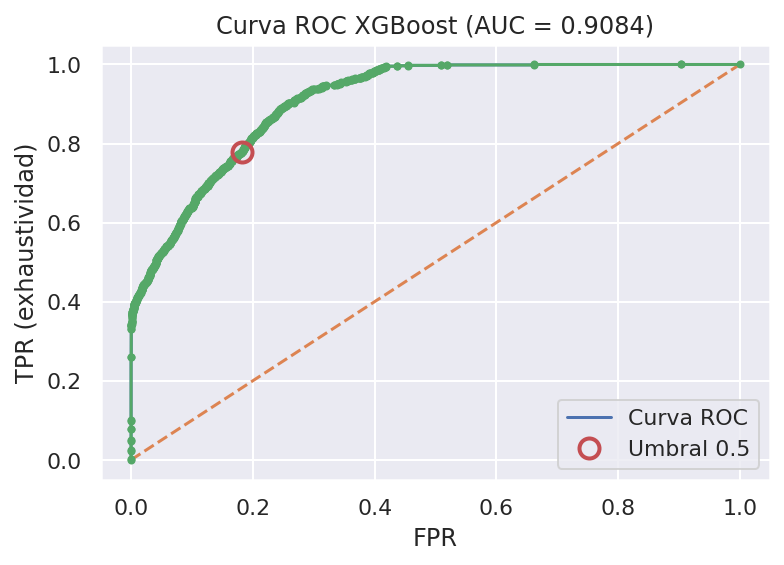

In [50]:
probs = model_1.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, probs)
fpr, tpr, umbrales = roc_curve(y_val, y_val_pred)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC XGBoost (AUC = %.4f)" % auc))

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
# show the plot
pyplot.show()

In [ ]:
y_train_pred_label = best_xgb.predict(X_train)
y_val_pred_label = best_xgb.predict(X_val)

In [ ]:
print(classification_report(y_train, y_train_pred_label))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     40112
           1       0.98      0.29      0.45      3734

    accuracy                           0.94     43846
   macro avg       0.96      0.64      0.71     43846
weighted avg       0.94      0.94      0.92     43846



In [ ]:
print(classification_report(y_val, y_val_pred_label))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.98      0.32      0.48       934

    accuracy                           0.94     10962
   macro avg       0.96      0.66      0.72     10962
weighted avg       0.94      0.94      0.93     10962



Evaluación XGBoost optimizado con f1

In [ ]:
y_train_pred = best_xgb_f1.predict_proba(X_train)[:,1]
y_val_pred = best_xgb_f1.predict_proba(X_val)[:,1]

In [ ]:
roc_auc_score(y_train, y_train_pred)

0.911063256945897

In [ ]:
roc_auc_score(y_val, y_val_pred)

0.9057504618759122

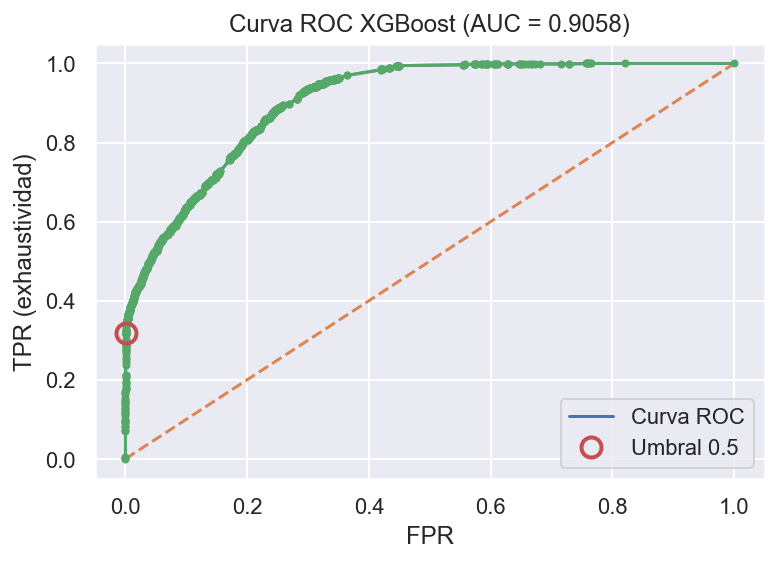

In [ ]:
probs = best_xgb_f1.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, probs)
fpr, tpr, umbrales = roc_curve(y_val, y_val_pred)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC XGBoost (AUC = %.4f)" % auc))

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
# show the plot
pyplot.show()

In [ ]:
y_train_pred_label = best_xgb_f1.predict(X_train)
y_val_pred_label = best_xgb_f1.predict(X_val)

In [51]:
print(classification_report(y_train, y_train_pred_label))

NameError: ignored

In [ ]:
print(classification_report(y_val, y_val_pred_label))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.98      0.32      0.48       934

    accuracy                           0.94     10962
   macro avg       0.96      0.66      0.72     10962
weighted avg       0.94      0.94      0.93     10962



In [ ]:
print(classification_report(y_train, y_train_pred_label))

In [ ]:
print(classification_report(y_val, y_val_pred_label))